Ex 3: Transparency in AI Decision-Making
Objective:
To compare transparent vs. black-box models.

To compare a transparent model (Decision Tree) and a black-box model (Random Forest) using the Wine dataset, and understand how transparency impacts interpretability, trust, and performance.

Import Libraries

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

Load the Wine Dataset

In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

Split into Train and Test Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Train Decision Tree (Transparent Model)

In [4]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

Train Random Forest (Black-Box Model)

In [5]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

Evaluation of both the Models

In [6]:
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

print("Decision Tree Accuracy:", acc_tree)
print("Random Forest Accuracy:", acc_forest)

Decision Tree Accuracy: 0.9629629629629629
Random Forest Accuracy: 1.0


Visualizion of Decision Tree

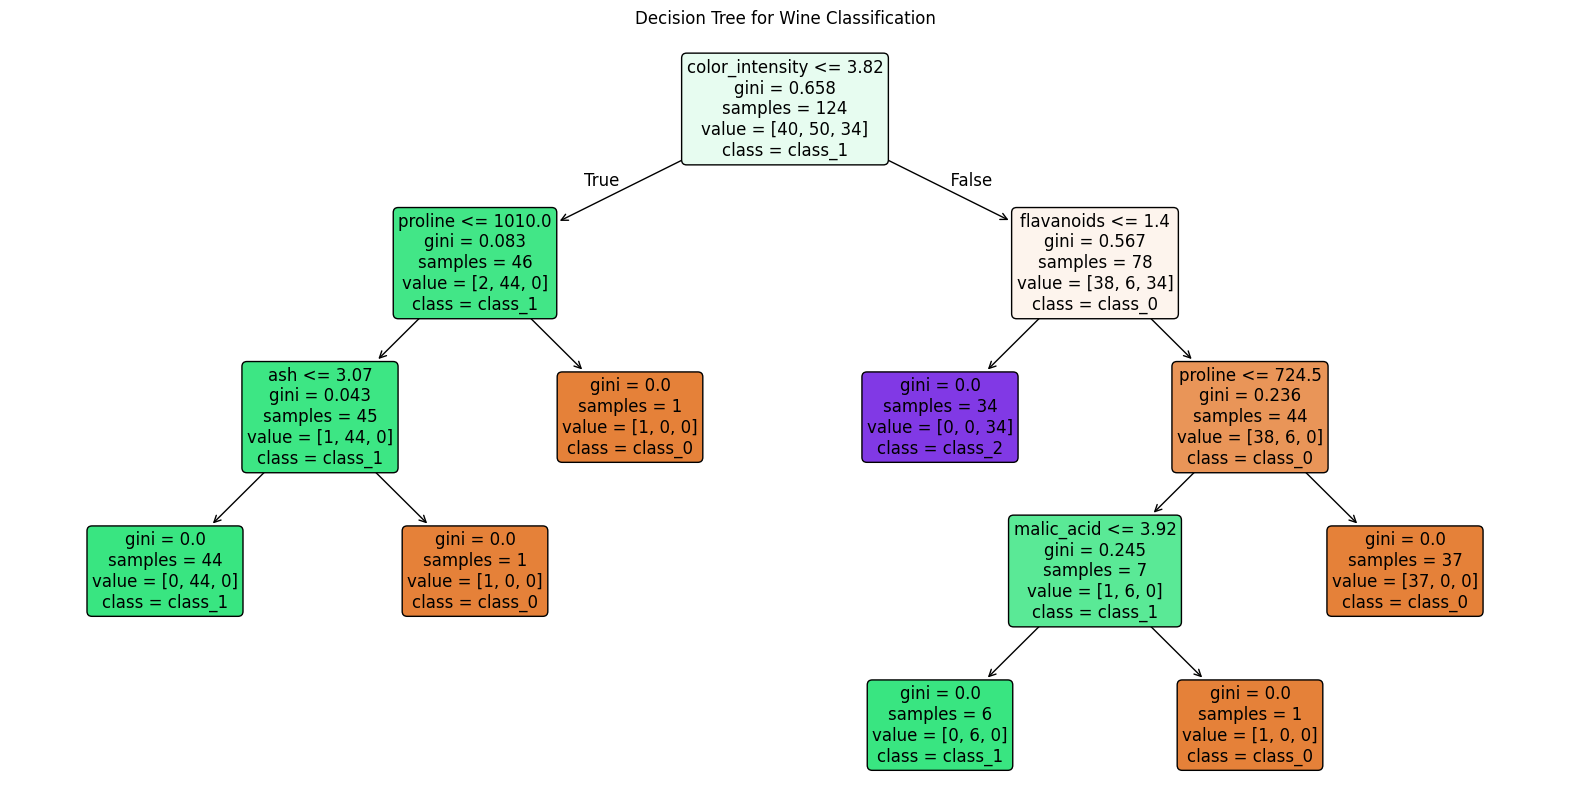

In [7]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=12,
)
plt.title("Decision Tree for Wine Classification")
plt.show()

Classification Reports for Deeper Insights

In [8]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest, target_names=data.target_names))

Decision Tree Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

Random Forest Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

